<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_07_python_voor_data_science_Opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Labo 7 - Python voor data science
Het doel van dit labo is dat je kan:
 - filteren met meerdere condities.
 - kolommen toevoegen, verwijderen en bewerken.
 - zelf in de documentatie eenvoudige functies leren gebruiken.
 - kijken of de data normaalverdeeld is.
 - uitschieters opsporen en verwijderen uit een dataset.

Gegeven is het bestand 'movies.csv' die de IMDB 5000 dataset bevat. Deze dataset bevat gegevens (afkomstig van imdb.com) over meer dan 5000 films.
Gebruik Python met bijhorende libraries om de onderstaande vragen uit te werken en te beantwoorden.



Een beschrijving van de verschillende variabelen kan je hieronder vinden:

| Variable Name |Description |
| --- | --- |
|movie_title 	|Title of the Movie |
| duration |	Duration in minutes |
|director_name |	Name of the Director of the Movie|
|director_facebook_likes |	Number of likes of the Director on his Facebook Page|
|actor_1_name |	Primary actor starring in the movie|
|actor_1_facebook_likes |	Number of likes of the Actor_1 on his/her Facebook Page|
|actor_2_name 	|Other actor starring in the movie|
|actor_2_facebook_likes |	Number of likes of the Actor_2 on his/her Facebook Page|
|actor_3_name |	Other actor starring in the movie|
|actor_3_facebook_likes |	Number of likes of the Actor_3 on his/her Facebook Page|
|num_user_for_reviews |	Number of users who gave a review|
|num_critic_for_reviews |	Number of critical reviews on imdb|
|num_voted_users 	|Number of people who voted for the movie|
|cast_total_facebook_likes |	Total number of facebook likes of the entire cast of the movie|
|movie_facebook_likes |	Number of Facebook likes in the movie page|
|facenumber_in_poster |	Number of the actor who featured in the movie poster|
|color 	|Film colorization. ‘Black and White’ or ‘Color’|
|title_year 	| The year in which the movie is released (1916:2016)
|language |	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc|
|country |	Country where the movie is produced|
|content_rating |	Content rating of the movie|
|aspect_ratio |	Aspect ratio the movie was made in|
|gross |	Gross earnings of the movie in Dollars|
|budget |	Budget of the movie in Dollars|
|imdb_score |	IMDB Score of the movie on IMDB|
|genres |	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’|


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

In [3]:
# Importeren van de dataset
dataset = pd.read_csv('movies.csv',sep=',')

In [4]:
# Toon de eerste 10 rijen
dataset.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action
5,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,Action
6,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,Adventure
7,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action
8,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,Adventure
9,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,Action


Hoeveel films steken in de dataset?

In [5]:
 movies = dataset['movie_title'].value_counts()
 print(movies.count())

3669


Hoeveel kolommen zijn er in de dataset?

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   director_name              3770 non-null   object 
 2   num_critic_for_reviews     3770 non-null   float64
 3   duration                   3770 non-null   float64
 4   director_facebook_likes    3770 non-null   float64
 5   actor_3_facebook_likes     3770 non-null   float64
 6   actor_2_name               3770 non-null   object 
 7   actor_1_facebook_likes     3770 non-null   float64
 8   gross                      3770 non-null   float64
 9   actor_1_name               3770 non-null   object 
 10  movie_title                3770 non-null   object 
 11  num_voted_users            3770 non-null   int64  
 12  cast_total_facebook_likes  3770 non-null   int64  
 13  actor_3_name               3770 non-null   objec

Wat zijn deze kolommen?

In [7]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'movie_title',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'genres'],
      dtype='object')

Gebruik de describe-functie om een overzicht te bekomen van de variabelen in de dataset. Bevat de dataset ontbrekende waarden of waarden die onrealistisch lijken?

In [8]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3.770000e+03,3.770000e+03,3770.000000,3770.000000,3770.000000,3.770000e+03,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,166.846419,110.221485,804.459682,769.151989,7724.785411,5.242427e+07,1.054415e+05,11489.983024,1.376393,335.670292,4.608673e+07,2003.009549,2015.390716,6.463873,2.111202,9330.752785
std,123.537036,22.631720,3062.831521,1891.113599,15496.630039,7.025551e+07,1.518841e+05,19096.558629,2.040899,410.916203,2.256040e+08,9.887261,4537.712194,1.057305,0.352764,21431.059266
min,1.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,2.200000e+01,0.000000,0.000000,1.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,192.250000,744.250000,8.083416e+06,1.937225e+04,1906.000000,0.000000,109.000000,1.000000e+07,1999.000000,382.000000,5.900000,1.850000,0.000000
50%,138.000000,106.000000,63.000000,434.500000,1000.000000,3.001317e+07,5.355750e+04,4041.000000,1.000000,209.000000,2.500000e+07,2005.000000,683.000000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,690.000000,13000.000000,6.672026e+07,1.282162e+05,16228.750000,2.000000,398.000000,5.000000e+07,2010.000000,975.750000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


Toon van alle kolommen hun datatypes.

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3770 non-null   object 
 1   director_name              3770 non-null   object 
 2   num_critic_for_reviews     3770 non-null   float64
 3   duration                   3770 non-null   float64
 4   director_facebook_likes    3770 non-null   float64
 5   actor_3_facebook_likes     3770 non-null   float64
 6   actor_2_name               3770 non-null   object 
 7   actor_1_facebook_likes     3770 non-null   float64
 8   gross                      3770 non-null   float64
 9   actor_1_name               3770 non-null   object 
 10  movie_title                3770 non-null   object 
 11  num_voted_users            3770 non-null   int64  
 12  cast_total_facebook_likes  3770 non-null   int64  
 13  actor_3_name               3770 non-null   objec

Hoeveel van de films zijn in kleur? Stel dit visueel voor aan de hand van een gepaste plot.

color
Color               3646
 Black and White     124
Name: count, dtype: int64


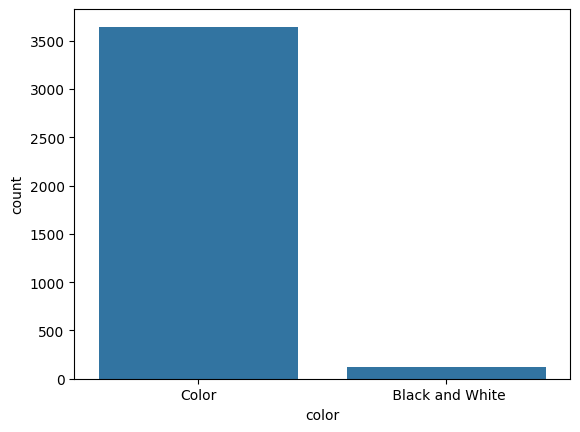

In [10]:
sns.countplot(x='color',data=dataset)
print(dataset['color'].value_counts())


Hoeveel verschillende genres zijn er aanwezig in de dataset?

In [ ]:
dataset['genres'].value_counts()

,count
genres,
Comedy,990
Action,960
Drama,675
Adventure,369
Crime,256
Biography,206
Horror,164
Animation,45
Fantasy,37


Visualiseer het aantal films per genre. Extra: lukt het jou om ze te sorteren van hoog naar laag?

17 {'Comedy', 'Animation', 'Sci-Fi', 'Fantasy', 'Documentary', 'Mystery', 'Action', 'Thriller', 'Horror', 'Romance', 'Crime', 'Musical', 'Western', 'Drama', 'Family', 'Biography', 'Adventure'}


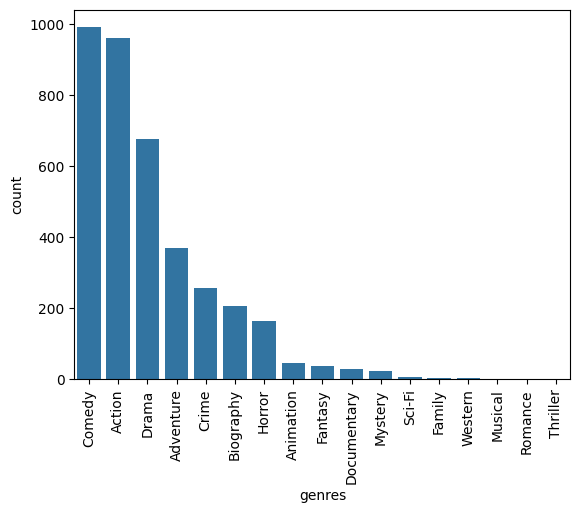

In [12]:
# Sort the genres before plotting
genre_counts = dataset['genres'].value_counts().sort_values(ascending=False)
unique_genres = set(g for gs in dataset['genres'].dropna() for g in gs.split('|'))
print(len(unique_genres), unique_genres)


# Use the sorted data in the countplot
sns.countplot(x='genres', data=dataset, order=genre_counts.index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

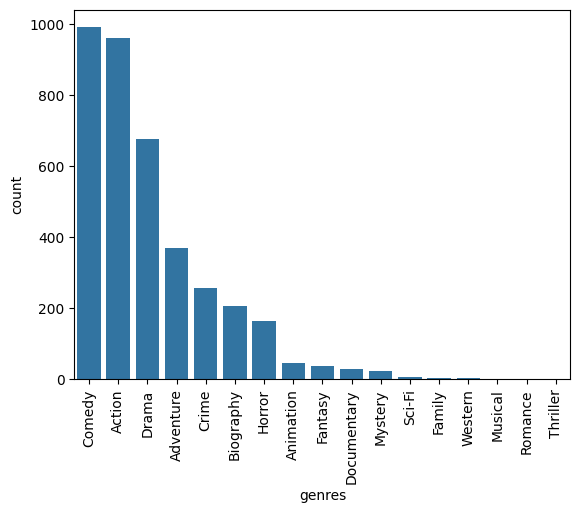

In [13]:
genre_counts = dataset['genres'].value_counts().sort_values(ascending=False)
sns.countplot(x='genres',data=dataset , order=genre_counts.index )
plt.xticks(rotation=90)
plt.show()

Wat is de hoogste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [14]:
hoogste_score = dataset['imdb_score'].max()
beste_film = dataset[dataset['imdb_score']== hoogste_score]
beste_film[['movie_title']]
print("Highest score:", hoogste_score)
print(dataset.loc[dataset['imdb_score'] == hoogste_score, 'movie_title'].unique())


Highest score: 9.3
['The Shawshank Redemption\xa0']


Wat is de laagste imdb score die een film/aflevering heeft gehaald? Welke film/aflevering haalde deze score?

In [15]:
laagste_score = dataset['imdb_score'].min()
slechtse_film = dataset[dataset['imdb_score'] == laagste_score]
slechtse_film[['movie_title']]
print("lowest  score:", laagste_score)
print(dataset.loc[dataset['imdb_score'] == laagste_score, 'movie_title'].unique())

lowest  score: 1.6
['Justin Bieber: Never Say Never\xa0']


Welke is de langste film en welke is de kortste film?

In [18]:
# langsste
langste_film = dataset['duration'].max()
langstdurendefilm = dataset[dataset['duration'] == langste_film]
langstdurendefilm[['movie_title']]
print("Longest duration:", dataset['duration'].max())



Longest duration: 330.0


In [19]:
# kortste
kortste_film = dataset['duration'].min()
kortstedefilm = dataset[dataset['duration'] == kortste_film]
kortstedefilm[['movie_title']]
print("Shortest duration:", dataset['duration'].min())


Shortest duration: 37.0


Hoeveel films hebben een PG13-rating en hebben een imdb score hoger dan 8.5?

In [20]:
voorwaarde_3 = dataset['content_rating'] == 'PG-13'
voorwaarde_4 = dataset['imdb_score'] > 8.5
dataset[voorwaarde_3 & voorwaarde_4].shape[0]

7

Hoeveel franstalige films zijn komedies?

In [21]:
voorwaarde_5 = dataset['language'] == 'French'
voorwaarde_6 = dataset['genres'] == 'Comedy'
dataset[voorwaarde_5 & voorwaarde_6].shape[0]

12

Wat is de maximale imdb score van een franstalige drama film? En hoelang duurde deze film?

In [23]:
voorwaarde_7  = dataset['language'] == 'French'
voorwaarde_8 = dataset['genres'] == 'Drama'  # Changed to comparison
# Get the maximum imdb_score for French Drama movies
max_drama_score = dataset[voorwaarde_7 & voorwaarde_8]['imdb_score'].max()
# Filter the DataFrame for movies matching the conditions
result = dataset[(dataset['language'] == 'French') & (dataset['genres'] == 'Drama') & (dataset['imdb_score'] == max_drama_score)]
# Print the movie title, duration, and imdb_score for the result
print(result[['movie_title','duration','imdb_score']])

     movie_title  duration  imdb_score
3070  Incendies      139.0         8.2


Verander de index van de dataframe van een getal naar de titel van de film. De documentatie van de te gebruiken functie kun je hier terug vinden: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

In [24]:
dataset.set_index('movie_title', inplace=True)

Sorteer van hoge omzet naar lage omzet (gross variabele). Gebruik hiervoor de sort_values functie.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
Toon de top 10

In [25]:
dataset.sort_values("gross",ascending=False,inplace=True,)
print("Sorted dataframe")
display(dataset.head(10))

Sorted dataframe


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,CCH Pounder,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Leonardo DiCaprio,793059,45223,Gloria Stuart,0.0,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000,Drama
Jurassic World,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Bryce Dallas Howard,418214,8458,Omar Sy,0.0,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000,Action
The Dark Knight,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Christian Bale,1676169,57802,Morgan Freeman,0.0,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,Action
Star Wars: Episode I - The Phantom Menace,Color,George Lucas,320.0,136.0,0.0,1000.0,Liam Neeson,20000.0,474544677.0,Natalie Portman,534658,37723,Ian McDiarmid,1.0,3597.0,English,USA,PG,115000000.0,1999.0,14000.0,6.5,2.35,13000,Action
Star Wars: Episode IV - A New Hope,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Harrison Ford,911097,13485,Kenny Baker,1.0,1470.0,English,USA,PG,11000000.0,1977.0,1000.0,8.7,2.35,33000,Action
Avengers: Age of Ultron,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Chris Hemsworth,462669,92000,Scarlett Johansson,4.0,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,Action


Maak een histogram van het aantal films volgens de imdb score. Bereken hiervoor zelf de klassenbreedte en bepaal zelf de bins

1.6
9.3
0.7700000000000001
[1.6, 2.37, 3.1400000000000006, 3.9100000000000006, 4.680000000000001, 5.450000000000001, 6.220000000000001, 6.99, 7.760000000000002, 8.530000000000001, 9.3]


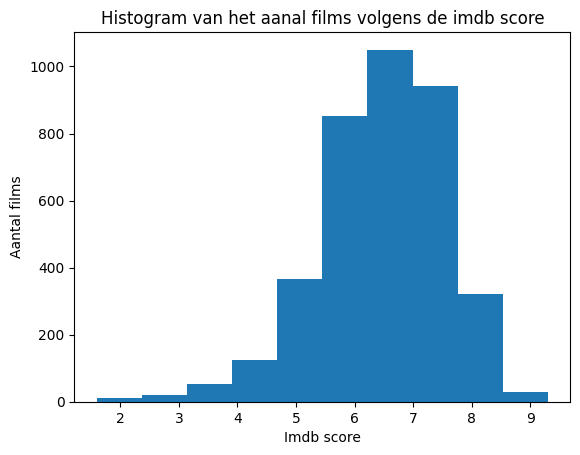

In [26]:
minimum = dataset['imdb_score'].min()
maximum = dataset['imdb_score'].max()
print(minimum)
print(maximum)
number_of_bins = 10
bin_width = (maximum - minimum) / number_of_bins
print(bin_width)
bins = [minimum + i * bin_width for i in range(number_of_bins + 1)]
print(bins)

plt.hist(dataset['imdb_score'],bins=bins)
plt.xlabel('Imdb score')
plt.ylabel('Aantal films')
plt.title('Histogram van het aanal films volgens de imdb score')
plt.show()

Het aantal facebook likes blijkt voor de klant toch niet relevant te zijn, verwijder alle kolommen waar facebook_likes in voorkomt.

In [27]:
dropfacebooklikes = dataset.drop(['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','movie_facebook_likes'],axis='columns')
dropfacebooklikes.head()

,color,director_name,num_critic_for_reviews,duration,actor_2_name,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,aspect_ratio,genres
movie_title,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,Joel David Moore,760505847.0,CCH Pounder,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,1.78,Action
Titanic,Color,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Leonardo DiCaprio,793059,45223,Gloria Stuart,0.0,2528.0,English,USA,PG-13,200000000.0,1997.0,7.7,2.35,Drama
Jurassic World,Color,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Bryce Dallas Howard,418214,8458,Omar Sy,0.0,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0,2.00,Action
The Avengers,Color,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1,1.85,Action
The Avengers,Color,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1,1.85,Action


Momenteel staan de opbrengst (gross) en het budget nog in dollars, maar de klant zou dit graag in euro's weergeven willen zien. Bewerk de kolommen naar het gevraagde format (voeg niet een nieuwe kolom toe, maar bewerk rechtsreeks de kolom) (1 amerikaanse dollar = 0.86 euro)

In [30]:
dataset['gross'] = (dataset['gross'] * 0.86).round(2)
dataset['budget'] = (dataset['budget'] * 0.86).round(2)
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,6.540350e+08,CCH Pounder,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,203820000.0,2009.0,936.0,7.9,1.78,33000,Action
Titanic,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,5.664582e+08,Leonardo DiCaprio,793059,45223,Gloria Stuart,0.0,2528.0,English,USA,PG-13,172000000.0,1997.0,14000.0,7.7,2.35,26000,Drama
Jurassic World,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,5.608725e+08,Bryce Dallas Howard,418214,8458,Omar Sy,0.0,1290.0,English,USA,PG-13,129000000.0,2015.0,2000.0,7.0,2.00,150000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,5.360204e+08,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,189200000.0,2012.0,21000.0,8.1,1.85,123000,Action
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,5.360204e+08,Chris Hemsworth,995415,87697,Scarlett Johansson,3.0,1722.0,English,USA,PG-13,189200000.0,2012.0,21000.0,8.1,1.85,123000,Action


De hoeveelheid winst (of verlies) van een film is niet in de dataset te vinden maar valt eenvoudig te berekenen door van de opbrengst de kosten af te trekken. Met andere woorden: $gross-budget$. Deze berekende winst voegen we toe aan onze dataset als volgt: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

Welke is de meest verlieslatende film en welke de meest winstgevende?

In [31]:
dataset.insert(
    loc=dataset.columns.get_loc('budget')+1,
    column='hoeveelheid_winst',
    value=dataset['gross'] - dataset['budget']
)


In [33]:
# find the highest-profit movie
max_profit = dataset['hoeveelheid_winst'].max()
movie_max  = dataset['hoeveelheid_winst'].idxmax()
print("Most profit:", max_profit, movie_max)

# find the biggest loss
min_profit = dataset['hoeveelheid_winst'].min()
movie_min  = dataset['hoeveelheid_winst'].idxmin()
print("Most loss:  ", min_profit, movie_min)


Most profit: 450215028.41999996 Avatar 
Most loss:   -10503436785.68 The Host 


In [ ]:
dataset.reset_index(inplace=True)  # movie_title → column again
# now your original approach works
idx_max = dataset['hoeveelheid_winst'].idxmax()
idx_min = dataset['hoeveelheid_winst'].idxmin()

print("Most profit:", dataset.loc[idx_max, 'hoeveelheid_winst'],
      dataset.loc[idx_max, 'movie_title'])
print("Most loss:  ", dataset.loc[idx_min, 'hoeveelheid_winst'],
      dataset.loc[idx_min, 'movie_title'])


Iemand beweert dat Sci-Fi films winstgevender zijn dan horror films. Klopt deze bewering? Gebruik de boxplot om je antwoord te staven.

[(20.0, 90.0)]

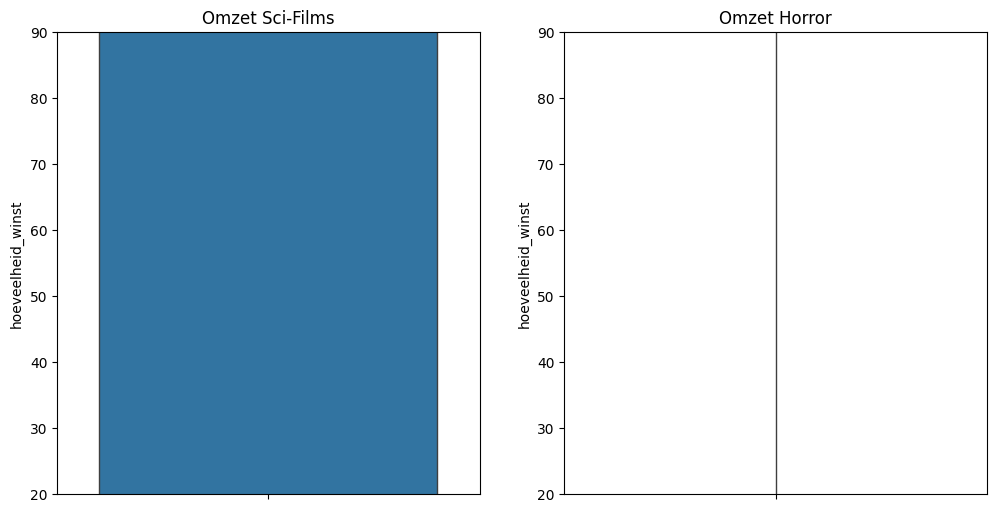

In [37]:
f,axes = plt.subplots(1,2,figsize=(12,6))
sns.boxplot(y='hoeveelheid_winst',data =  dataset[dataset['genres'] == "Sci-Fi"],whis=1.5,ax=axes[0])
axes[0].set_title('Omzet Sci-Films')
axes[0].set(ylim=(20,90))


sns.boxplot(y= 'hoeveelheid_winst',data =  dataset[dataset['genres'] == "Horror"],whis=1.5,ax=axes[1])
axes[1].set_title('Omzet Horror')
axes[1].set(ylim=(20,90))


Is de winst normaalverdeeld?

In [40]:
# Assuming 'dataset' is already indexed by movie_title and contains the column 'hoeveelheid_winst'

# 1) Pull out the winst series (preserving the movie_title index) and drop NaNs
winst = dataset['hoeveelheid_winst'].dropna()

# 2) Compute and print summary statistics
print("Mean:",       winst.mean())
print("StdDev:",     winst.std())
print("Skewness:",   winst.skew())
print("Kurtosis:",   winst.kurtosis())


Mean: 5450283.982546421
StdDev: 197363667.82824418
Skewness: -42.60856156996879
Kurtosis: 2172.4114454531386


No—the profit (“winst”) distribution is very far from normal:

Skewness ≈ –42.6
A normal distribution has skewness ≈ 0. Anything beyond ±1 or ±2 is already quite skewed; –42! means a huge left‐tail outlier effect.

Excess kurtosis ≈ 2172
A normal distribution’s excess kurtosis is 0. Values above, say, 3 or 4 already indicate heavy tails; 2,172 tells you there are extreme outliers far more often than a Gaussian would ever produce.

1Bepaal de uitschieters bij de winst. Welke film brachten een extreem grote winst met zich mee en welke een extreem groot verlies?
Bereken de uitschieters op twee mogelizjke manieren:
1. Via de interkwartielafstand: uitschieters zijn waarden die groter zijn dan Q3 + 1,5 keer de interkwartielafstand of kleiner zijn dan Q1- 1,5 keer de interkwartielafstand.
2. Via de standaardafwijking: waarden die meer dan 3 standaardafwijken van het gemiddelde gelegen zijn. Dus waarden groter dan gemiddelde + 3 keer de std.afw en waarden kleiner dan het gemiddelde - 3 keer de standaardafwijking.

Interkwartielafstand (IQR): 26770743.7265

Uitschieters:
                                                    hoeveelheid_winst
movie_title                                                          
AvatarÂ                                                  3.871849e+08
TitanicÂ                                                 3.392340e+08
Jurassic WorldÂ                                          3.714103e+08
The AvengersÂ                                            2.982656e+08
The AvengersÂ                                            2.982656e+08
The Dark KnightÂ                                         2.576146e+08
Star Wars: Episode I - The Phantom MenaceÂ               2.659192e+08
Star Wars: Episode IV - A New HopeÂ                      3.327724e+08
Avengers: Age of UltronÂ                                 1.545702e+08
The Dark Knight RisesÂ                                   1.465374e+08
Shrek 2Â                                                 2.118740e+08
E.T. the Extra-TerrestrialÂ      

In [44]:
q1 = dataset['hoeveelheid_winst'].quantile(0.25)
q3 = dataset['hoeveelheid_winst'].quantile(0.75)
iqr = q3 -q1
uitschieters = dataset[(dataset['hoeveelheid_winst'] < q1 - 1.5 * iqr) | (dataset['hoeveelheid_winst'] >  q3 + 1.5 * iqr)]
print("Interkwartielafstand (IQR):", iqr)
print("\nUitschieters:")
print(uitschieters[['hoeveelheid_winst']])

Interkwartielafstand (IQR): 31128771.775

Uitschieters:
                                                    hoeveelheid_winst
movie_title                                                          
Avatar                                                   4.502150e+08
Titanic                                                  3.944582e+08
Jurassic World                                           4.318725e+08
The Avengers                                             3.468204e+08
The Avengers                                             3.468204e+08
The Dark Knight                                          2.995518e+08
Star Wars: Episode I - The Phantom Menace                3.092084e+08
Star Wars: Episode IV - A New Hope                       3.869447e+08
Avengers: Age of Ultron                                  1.797328e+08
The Dark Knight Rises                                    1.703924e+08
Shrek 2                                                  2.463651e+08
E.T. the Extra-Terrestrial        

In [45]:
upper_limit = dataset['hoeveelheid_winst'].mean() + 3 * dataset['hoeveelheid_winst'].std()
lower_limit = dataset['hoeveelheid_winst'].mean() - 3 * dataset['hoeveelheid_winst'].std()
print(upper_limit)
print(lower_limit)

597541287.467279
-586640719.5021861


Verwijder de uitschieters gevonden via de standaardafwijking uit de dataset.

In [46]:
remove_outliers = dataset[(dataset['hoeveelheid_winst'] < upper_limit) & (dataset['hoeveelheid_winst'] > lower_limit)]
print(remove_outliers)

                            color          director_name  \
movie_title                                                
Avatar                      Color          James Cameron   
Titanic                     Color          James Cameron   
Jurassic World              Color        Colin Trevorrow   
The Avengers                Color            Joss Whedon   
The Avengers                Color            Joss Whedon   
...                           ...                    ...   
Detention of the Dead       Color        Alex Craig Mann   
The Trials of Darryl Hunt   Color            Ricki Stern   
In Her Line of Fire         Color  Brian Trenchard-Smith   
The Jimmy Show              Color           Frank Whaley   
Skin Trade                  Color    Ekachai Uekrongtham   

                            num_critic_for_reviews  duration  \
movie_title                                                    
Avatar                                       723.0     178.0   
Titanic                    